In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
pip install  seaborn

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('/Users/shreyas/Desktop/ANALYSIS/data/transaction_data.csv')

In [20]:
print(df.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [21]:
print(df.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [22]:
df['DATE'] = pd.to_datetime(df['DATE'], origin='1899-12-30', unit='D')

In [23]:
df = df.drop_duplicates()

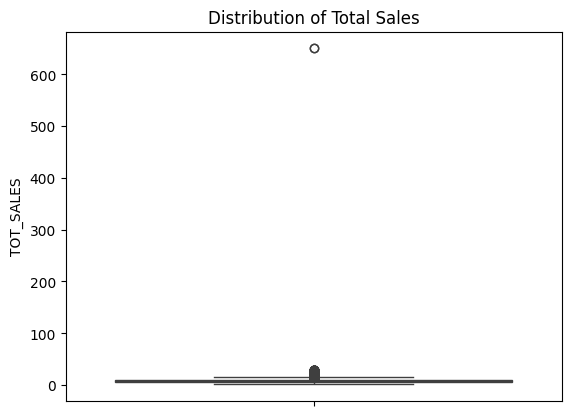

In [24]:
sns.boxplot(df['TOT_SALES'])
plt.title('Distribution of Total Sales')
plt.show()

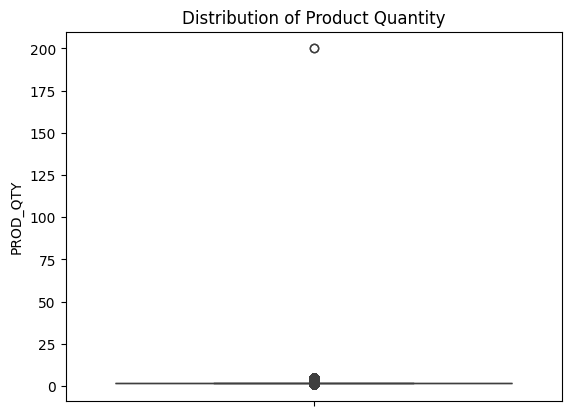

In [25]:
sns.boxplot(df['PROD_QTY'])
plt.title('Distribution of Product Quantity')
plt.show()

Top 3 Most Profitable Products

Top 3 Most Profitable Products:
                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40352.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


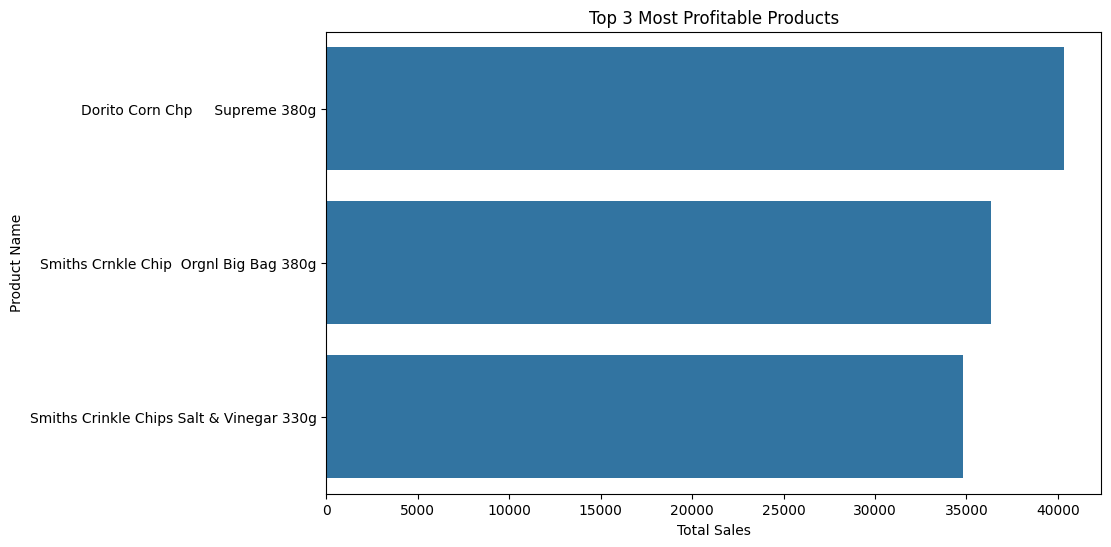

In [37]:
roduct_sales = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Sort by total sales in descending order
product_sales = product_sales.sort_values(by='TOT_SALES', ascending=False)

# Display the top 3 most profitable products
top_3_products = product_sales.head(3)
print("Top 3 Most Profitable Products:")
print(top_3_products)

# Visualize the top 3 products
plt.figure(figsize=(10, 6))
sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_3_products)
plt.title('Top 3 Most Profitable Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

# Save merged dataset
merged_df.to_csv("merged_data.csv", index=False)

In [35]:
import pandas as pd

# Load datasets
transaction_df = pd.read_csv("/Users/shreyas/Desktop/ANALYSIS/data/transaction_data.csv")
purchase_df = pd.read_csv("/Users/shreyas/Desktop/ANALYSIS/data/purchase_behaviour.csv")

# Merge datasets on LYLTY_CARD_NBR
merged_df = transaction_df.merge(purchase_df, on="LYLTY_CARD_NBR", how="left")

# Save merged dataset
merged_df.to_csv("merged_data.csv", index=False)

# Display first few rows
print(merged_df.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPLES           Budget  
3  MIDAGE SINGLES/COUPLES           Budget  
4  MIDAGE SINGLES/COUPL

Characteristics of Most Loyal Customers:
                 LIFESTAGE PREMIUM_CUSTOMER  COUNT
0   MIDAGE SINGLES/COUPLES           Budget    638
1   MIDAGE SINGLES/COUPLES       Mainstream   2311
2   MIDAGE SINGLES/COUPLES          Premium   1428
3             NEW FAMILIES           Budget     69
4             NEW FAMILIES       Mainstream     50
5             NEW FAMILIES          Premium     13
6           OLDER FAMILIES           Budget  10687
7           OLDER FAMILIES       Mainstream   6919
8           OLDER FAMILIES          Premium   5126
9    OLDER SINGLES/COUPLES           Budget   3040
10   OLDER SINGLES/COUPLES       Mainstream   2898
11   OLDER SINGLES/COUPLES          Premium   2807
12                RETIREES           Budget   1642
13                RETIREES       Mainstream   2153
14                RETIREES          Premium   1291
15          YOUNG FAMILIES           Budget   8765
16          YOUNG FAMILIES       Mainstream   5282
17          YOUNG FAMILIES          Premi

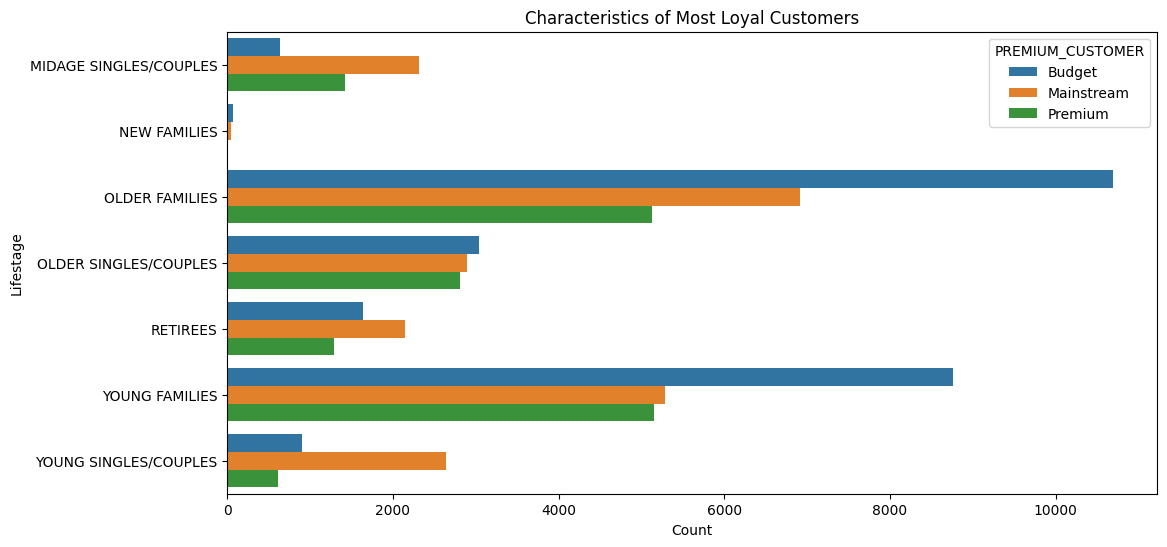

In [36]:
customer_sales = merged_df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()

customer_sales = customer_sales.sort_values(by='TOT_SALES', ascending=False)

top_10_percent = int(len(customer_sales) * 0.1)
most_loyal_customers = customer_sales.head(top_10_percent)

loyal_customers_details = merged_df[merged_df['LYLTY_CARD_NBR'].isin(most_loyal_customers['LYLTY_CARD_NBR'])]

loyal_customers_summary = loyal_customers_details.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='COUNT')

print("Characteristics of Most Loyal Customers:")
print(loyal_customers_summary)

plt.figure(figsize=(12, 6))
sns.barplot(x='COUNT', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=loyal_customers_summary)
plt.title('Characteristics of Most Loyal Customers')
plt.xlabel('Count')
plt.ylabel('Lifestage')
plt.show()

merged_df.to_csv("merged_data.csv", index=False)